# Data Preprocessing

## Importing the libraries

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [294]:
data_set = pd.read_csv('data/zomato_reviews.csv',delimiter=',', quotechar='"', quoting=3, on_bad_lines='skip')
data_set = data_set.drop(columns='Unnamed: 0')
tsv_file = 'data/zomato_reviews.tsv' 
data_set.to_csv(tsv_file, sep='\t', index=False)


## Checking Dataset

In [295]:
data_set.rating=data_set.rating.replace([1,2,3],0)
data_set.rating=data_set.rating.replace([4,5],1)
print(data_set)


      rating                                             review
0          1                                               nice
1          1     delivery boy was very decent and supportive.👌👍
2          1  all food is good and tasty . will order again ...
3          1  shandar zabardast zindabad .. good going bawar...
4          1         overall good experience . will order again
...      ...                                                ...
4911       0  more than 1 hours timing for prepare my order ...
4912       1            No spoon so what i do and how can i eat
4913       1                                           complain
4914       1  it took 1 hour to assign valvet and thn prepar...
4915       0  Taste was stale and they give only 5 pieces in...

[4916 rows x 2 columns]


In [296]:
print(data_set.columns)


Index(['rating', 'review'], dtype='object')


In [297]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [298]:
# Process the reviews
corpus = []
for i in range(len(y)):
    review_text = data_set['review'][i]

    # Ensure the review text is in string format
    if isinstance(review_text, bytes):
        review_text = review_text.decode('utf-8')
    else:
        review_text = str(review_text)

    zomato_ratings = re.sub('[^a-zA-Z]', ' ', review_text)
    zomato_ratings = zomato_ratings.lower()
    zomato_ratings = zomato_ratings.split() 
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    zomato_ratings = [ps.stem(word) for word in zomato_ratings if not word in set(all_stopwords)]
    zomato_ratings=''.join(zomato_ratings)
    corpus.append(zomato_ratings)




In [299]:
print(corpus)

['nice', 'deliveriboydecentsupport', 'foodgoodtastiorderlotexplorbawarchimenu', 'shandarzabardastzindabadgoodgobawarchikeep', 'overalgoodexperiorder', 'goodcoldfood', 'tastifoodhomestyltastipreprat', 'love', 'tastiauthentfood', 'superbtastiaslidilliwalaflavour', 'yummiestmanchurianfririceevercitiauthentchinestastmustorder', 'veeytastiordernd', 'ordermanchurianfririceinsteadgotsimplfriricefeellikecheatbawarchirestaur', 'badnotproperlicook', 'delici', 'chinescheeskulchagoodfusionchinsespunjabicuisinaccomplishdalmakhniyummibuttermilkmustorder', 'tastlessndtookmindelivorder', 'trilotdishbawarchichoosbestreallitoughtaskdishawesom', 'bawarchisatisficustomneed', 'helpnaturresturowner', 'somethgoodcocktailpartirestaurmentiongoodquantitigoodlageraho', 'superbtastreallisupremthalitastquantiti', 'freepizzanotgivenpizzahutfraudtillcustomconditfulfil', 'good', 'pizzabasenotbakeproperlinotcrunchilapinopizzabakeproperli', 'goodexperi', 'time', 'badwastmoneypizzahutlikebadqualiti', 'pizzagotcoldwastmo




## Bag of words

In [300]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1600)
x = cv.fit_transform(corpus).toarray()
y = [1 if 'good' in review else 0 for review in corpus]

## Splitting data into Test set & Training Set


In [301]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)


## Training Naive Bayes

In [302]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)


GaussianNB()

In [303]:

# Use GridSearchCV to find the best parameters for the model
model = MultinomialNB()
parameters = {'alpha': [0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[546   0]
 [ 70  64]]
Accuracy Score: 0.8970588235294118


## Prediction on the test set

In [304]:
y_pred = classifier.predict(x_test) 
print(np.concatenate((y_pred_np.reshape(len(y_pred_np), 1), y_test_np.reshape(len(y_test_np), 1)), axis=1))

[[1 0]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 0]]


## Making Confusion Matrix

In [305]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[114 432]
 [  0 134]]


0.36470588235294116

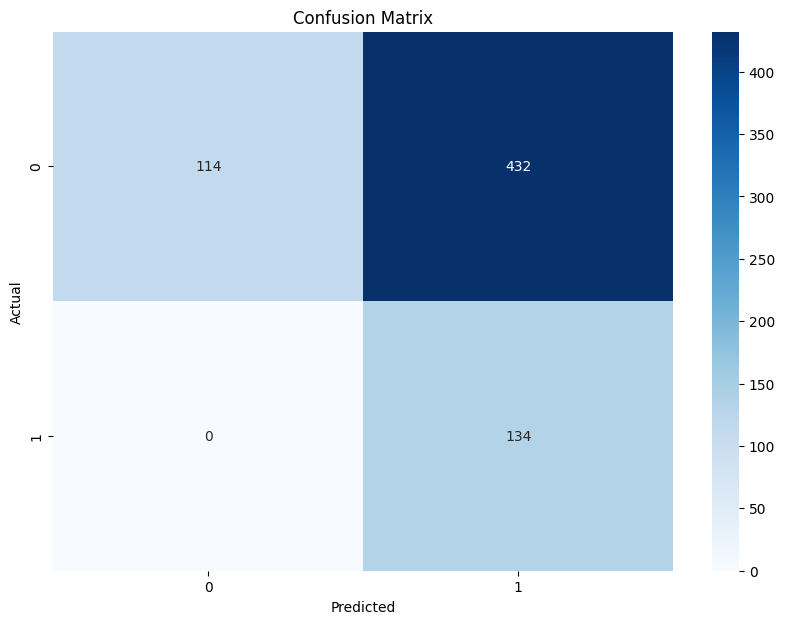

In [306]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
